In [2]:
import os
import cv2
import torch
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
best_weights = os.path.join('model_files', 'weights', 'best.pt')
model = torch.hub.load('ultralytics/yolov5', 'custom', best_weights)

Using cache found in C:\Users\uzair/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-8-1 Python-3.10.4 torch-1.12.0+cu116 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


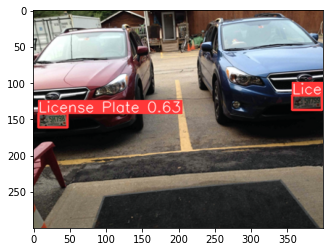

In [18]:
%matplotlib inline
image = cv2.imread('test_images/Cars47.png')
# Convert image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Predicting from model
results = model(image)
# Getting co ordinates of license plate
results_df = results.pandas().xyxy[0].loc[1]
x_min = int(results_df['xmin'])
x_max = int(results_df['xmax'])
y_min = int(results_df['ymin'])
y_max = int(results_df['ymax'])
# Cropping license plate from image ""
number_plate = image[y_min:y_max,x_min:x_max]
# Performing OCR on image 

# Showing the results 
plt.imshow(np.squeeze(results.render()))
plt.show()